# PolyNet: A Pursuit of Structural Diversity in Very Deep Networks

# https://arxiv.org/abs/1611.05725

## Abstract

The paper **PolyNet: A Pursuit of Structural Diversity in Very Deep Networks** proposes a new architectural direction for deep convolutional networks — **structural diversity** — as an alternative to simply increasing depth or width. The authors introduce **PolyInception modules**, polynomial combinations of Inception units that enhance representational power without proportional growth in computational cost. The resulting architecture, **Very Deep PolyNet**, achieves state-of-the-art performance on ILSVRC 2012, reducing top-5 validation error to **4.25% (single-crop)** and **3.45% (multi-crop)**, outperforming Inception-ResNet-v2 and its deeper variants.

---

## Problems

1. **Diminishing Returns from Depth**: Increasing depth improves performance up to a point, beyond which gains become marginal while training difficulty escalates.  
2. **Quadratic Cost of Width**: Widening networks causes a quadratic increase in memory and computation without proportional accuracy gains.  
3. **Limited Structural Diversity**: Existing designs (e.g., ResNet, Inception) emphasize linear stacking, underexploring topological diversity that could increase representational power efficiently.  
4. **Overfitting in Very Deep Models**: Extremely deep networks tend to overfit despite large datasets like ImageNet.

---

## Proposed Solutions

### Structural Diversity as a Third Dimension
Move beyond depth and width to design architectures that combine multiple transformation paths.

### PolyInception Modules
Introduce polynomial compositions of Inception units such as:

$$
I + F + F^2 \quad \text{or} \quad I + F + GF
$$

These incorporate deeper or parallel paths within each residual unit.

### Module Variants
Develop several versions — **poly-2, mpoly-2, poly-3, mpoly-3, and 2-way** — allowing flexible trade-offs between computational cost and representational expressivity.

### Very Deep PolyNet
Assemble these modules into a scalable architecture balancing expressive power, computational budget, and training feasibility.

### Stochastic Paths
Randomly drop paths within modules during training to reduce overfitting and encourage ensemble-like diversity.

---

## Purpose

The purpose of PolyNet is to **push the frontier of deep convolutional performance** by exploring **structural diversity** — a new design dimension — to achieve better generalization and efficiency than traditional strategies that only scale depth or width.

---

## Methodology

### Design Experiments
- Replace Inception-ResNet-v2 modules with various PolyInception variants in **stages A, B, and C** (different spatial scales).  
- Conduct ablation studies (e.g., **IR-3-6-3**, **IR-6-12-6**) to evaluate cost-performance trade-offs.  
- Test both **uniform** and **mixed** module configurations.

### Training Settings
- **Dataset**: ILSVRC 2012 (1.28M training, 50K validation).  
- **Optimizer**: RMSProp with batch normalization.  
- **Learning Rate Schedule**: Start at 0.45, decay ×0.1 every 160k iterations, trained for 560k iterations.  
- **Augmentation**: Multi-area cropping and resizing to 299×299 or 331×331.  
- **Hardware**: Distributed training on clusters of 8–32 GPUs.  
- **Initialization**: “Initialization-by-Insertion” from pretrained smaller models.  
- **Regularization**: Stochastic paths and residual scaling ($\beta = 0.3$).

### Evaluation Metrics
- **Top-1** and **Top-5** error on ImageNet validation/test sets.  
- Both **single-crop** and **multi-crop** evaluations with top-k pooling.

---

## Results

### Performance Gains
- PolyInception consistently outperforms baseline Inception-ResNet-v2 across all stages.  
- Mixed configurations yield the highest accuracy.  
- Structural diversity achieves better cost efficiency than simply adding depth.

### Benchmark Results

| Model | Top-5 Error (Validation, Single-Crop) | Top-5 Error (Validation, Multi-Crop) |
|--------|--------------------------------------|--------------------------------------|
| Inception-ResNet-v2 | 4.9% | 3.7% |
| Very Deep PolyNet | **4.25%** | **3.45%** |

### Efficiency
PolyNet achieves higher accuracy with **fewer parameters (92M vs. 133M)** for a deepened Inception-ResNet-v2 at comparable computational cost.

### Key Observation
Structural diversity scales better than additional depth — beyond a certain complexity budget, **adding diverse paths yields larger accuracy improvements than stacking layers**.

---

## Conclusions

PolyNet demonstrates that enhancing **structural diversity** — through polynomially composed Inception units — provides a **powerful and scalable alternative** to deepening or widening networks. The **Very Deep PolyNet** achieves new state-of-the-art results on ImageNet with lower error and parameter cost. This work establishes structural diversity as a **critical dimension in future deep architecture design**, complementing traditional notions of depth and width, and inspiring further research into **modular, ensemble-like neural topologies**.


# Mathematical Foundations of PolyNet

## 1. Core Mathematical Model: Residual Operator Equation

### Equation (1): Residual Unit
$$
(I + F) \cdot x = x + F(x)
$$

**Explanation:**

- \( x \): Input to the residual unit.  
- \( I \): Identity operator — passes \( x \) unchanged.  
- \( F \): Nonlinear transformation (a block of convolution, batch normalization, and ReLU).  

This expresses a **residual connection**, the foundation of ResNet.  
Instead of learning a direct mapping \( H(x) \), the network learns the **residual function** \( F(x) \), which stabilizes gradient flow and mitigates vanishing gradients.

**Role in the Paper:**  
This equation serves as the **baseline formulation** that PolyNet generalizes.

---

## 2. Polynomial Generalization of Residual Learning

### Equation (2): Second-Order PolyInception
$$
(I + F + F^2) \cdot x = x + F(x) + F(F(x))
$$

**Explanation:**

This generalizes the residual unit into a **polynomial operator** of degree 2.

- \( F^2 \) means applying the same transformation twice: \( F(F(x)) \).

The output combines three paths:

1. **Identity path:** \( x \)
2. **First-order path:** \( F(x) \)
3. **Second-order path:** \( F(F(x)) \)

This is called **PolyInception** because the architecture behaves like a **polynomial expansion**:
$$
(I + F + F^2 + \dots) \cdot x
$$

**Role in the Paper:**  
Introduces **structural diversity** — multiple transformation depths within a single unit, integrating parallel and recursive paths rather than purely sequential stacking.

---

## 3. Operator Algebra and Module Variants

| **Module Type** | **Mathematical Form** | **Meaning** |
|------------------|------------------------|--------------|
| poly-2 | \( I + F + F^2 \) | Two identical Inception blocks (shared parameters). |
| mpoly-2 | \( I + F + GF \) | Two Inception blocks with different parameters \( G \). |
| 2-way | \( I + F + G \) | Two parallel first-order paths (no recursion). |
| poly-3 | \( I + F + F^2 + F^3 \) | Third-order polynomial composition, deeper transformation paths. |
| mpoly-3 | \( I + F + GF + HGF \) | Third-order with independent parameter sets \( G, H \). |

**Explanation:**  
These algebraic formulations express increasing **representational power**:
- \( F^2, F^3 \): Deeper transformations.
- \( G, H \): Introduce heterogeneity (different filters or parameter sets).
- “\( I + \dots \)” ensures gradient flow through skip connections.

**Role:**  
Defines **new neural building blocks** that enhance expressivity without quadratic growth in computational cost.

---

## 4. Structural Diversity as Polynomial Composition

Mathematically, PolyNet treats a deep network as a **polynomial of operators**:

$$
P(F) = I + \alpha_1 F + \alpha_2 F^2 + \dots + \alpha_n F^n
$$

Each term represents a transformation path of different depth, forming a **weighted ensemble** of operations.

**Analogy:**  
In algebra, a polynomial approximates complex functions by combining powers of a variable.  
Here, powers of \( F \) approximate complex hierarchical mappings.

**Statistical Interpretation:**  
Functions as an **implicit ensemble**, averaging predictions from multiple sub-transformations — improving generalization and robustness.

---

## 5. Training Optimization Mathematics

### RMSProp Optimizer

$$
v_t = \rho v_{t-1} + (1 - \rho) g_t^2
$$

$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{v_t + \epsilon}} g_t
$$

**Parameters:**

- \( g_t \): Gradient at iteration \( t \)  
- \( v_t \): Moving average of squared gradients  
- \( \rho \): Decay factor (0.9)  
- \( \eta \): Learning rate (0.45 initial)  
- \( \epsilon \): Numerical stability constant  

**Role:**  
Normalizes gradients by their recent magnitudes, ensuring stable convergence in large-scale training.

---

## 6. Regularization and Statistical Randomization

### Residual Scaling
$$
(I + \beta F + \beta G), \quad \beta = 0.3
$$

**Explanation:**  
Scaling residual outputs prevents gradient explosion in very deep architectures.

### Stochastic Paths

Introduce Bernoulli random variables \( z_i \sim \text{Bernoulli}(p_i) \) per path:

$$
y = I + \sum_i z_i F_i(x)
$$

**Interpretation:**  
Each training iteration samples a different sub-network, yielding an **ensemble averaging effect** similar to dropout or stochastic depth.

---

## 7. Empirical Measurement and Error Statistics

**Performance Metrics:**
- **Top-1 Error:** Incorrect highest-probability prediction.
- **Top-5 Error:** Correct label not in top five predictions.

**Example:**
$$
\text{Top-5 Error (PolyNet)} = 4.25\%, \quad \text{vs. Inception-ResNet-v2} = 4.9\%
$$

**Statistical Role:**  
Quantifies model generalization improvements from structural diversity.

---

## 8. Ensemble Interpretation of Residual Networks

Mathematically, ResNets and PolyNets behave as ensembles of shallow subnetworks:

$$
f(x) = \sum_i w_i f_i(x)
$$

Each path \( f_i(x) \) represents a subset of residual or PolyInception transformations.  
This **ensemble view** explains their strong generalization and stability.

---

## Summary Table

| **Concept** | **Expression** | **Purpose / Interpretation** |
|--------------|----------------|------------------------------|
| Residual connection | \( x + F(x) \) | Enables gradient flow and deep learning stability. |
| Polynomial residuals | \( x + F(x) + F(F(x)) \) | Introduces structural diversity and recursive depth. |
| Polynomial operator form | \( P(F) = I + F + F^2 + \dots \) | Models multiple transformation depths algebraically. |
| Parameter variation | \( I + F + GF + HGF \) | Adds heterogeneity among transformation paths. |
| Residual scaling | \( I + \beta F + \beta G \) | Prevents gradient explosion. |
| Stochastic paths | \( I + \sum_i z_i F_i(x) \) | Randomly samples subnetworks to reduce overfitting. |
| RMSProp updates | Gradient normalization | Adaptive, stable optimization. |
| Top-k error | Classification accuracy | Evaluates generalization on ImageNet. |

---

## Final Interpretation

PolyNet mathematically reframes deep learning as a **polynomial system of operators**, combining:

- **Linear identity mappings** \( I \)
- **Nonlinear transformations** \( F \)
- **Recursive compositions** \( F^2, F^3, \dots \)
- **Randomized sampling** (stochastic paths)

This unifies **algebraic composition** with **statistical ensemble behavior**, proving that **structural diversity** is a powerful third axis — alongside **depth** and **width** — in deep neural network design.


# Research Gap Analysis — *PolyNet: A Pursuit of Structural Diversity in Very Deep Networks* (CVPR 2017)

| **Research Gap / Problem** | **How This Limits Prior Work** | **Paper’s Proposed Solution** | **Evidence / Notes** |
|-----------------------------|--------------------------------|-------------------------------|-----------------------|
| **Diminishing returns from simply increasing depth (very deep ResNets)** | Increasing depth improves accuracy only marginally while making optimization harder and computationally expensive. | Introduce **structural diversity** as a third design axis via **PolyInception modules** — polynomial compositions of Inception units rather than pure depth stacking. | Shows that depth beyond ~ResNet-269 yields minimal gain; formalizes operators such as \( I + F + F^2 \) and \( I + F + GF \) to add diverse paths within a unit. Demonstrates higher accuracy at controlled cost. |
| **Widening networks inflates cost quadratically** | Increasing width increases runtime and memory roughly with \( k^2 \), often without proportional accuracy gains. | Keep moderate width but enhance representational capacity through **path diversity** inside modules. | Argues that widening is cost-inefficient; demonstrates that structural diversity improves representational richness without quadratic compute growth. |
| **Lack of a principled way to build and evaluate structural diversity** | Prior architectures (ResNet, Inception) offer little guidance on when or how topological diversity should replace depth or width. | Conduct systematic **ablations** replacing Inception-ResNet-v2 (IR-v2) units with PolyInception variants (2-way, poly-2/3, mpoly-2/3) across stages A/B/C. | Produces cost–performance trade-off charts (time/parameters vs accuracy); finds **stage-B replacements yield the largest gains**, and **mpoly-3/poly-3** are most effective there. Provides design heuristics by stage and compute budget. |
| **Uniform module choices within stages underuse diversity** | Homogeneous blocks across a stage can limit the network’s topological expressiveness. | Adopt **mixed compositions** within a stage (e.g., interleaving 3-way, mpoly-3, poly-3 modules). | Mixed **stage-B** configurations outperform any single uniform variant at similar computational cost, confirming inter-module diversity benefits. |
| **Overfitting in very deep models (even on ImageNet)** | Deep networks often overfit late in training despite large datasets. | Apply **stochastic paths** — randomly dropping paths within PolyInception modules during training. | Behaves like an ensemble both structurally and statistically; reduces co-adaptation and improves validation accuracy and robustness. |
| **Instability in initializing or training very deep networks** | Random initialization in very deep models causes slow or unstable convergence; residual summations can destabilize updates. | Use **“initialization-by-insertion”** (grow deeper networks from pretrained shallower ones) and **residual scaling** (\( \beta \approx 0.3 \)). | Stabilizes early optimization; residual scaling mitigates exploding updates when summing multiple residual paths. |
| **Need for state-of-the-art accuracy under a practical compute budget** | Previous SOTA (Inception-ResNet-v2) could be improved, but deeper or wider variants are inefficient. | Build the **Very Deep PolyNet** — stage-A uses 2-way modules, stages B/C mix poly-3 and 2-way modules; train with RMSProp, strong augmentation, and above regularizers. | Achieves **4.25% top-5 single-crop** and **3.45% multi-crop** validation error, outperforming IR-v2 and deeper baselines. Shows better accuracy scaling with parameter and compute budgets. |

---

### Summary Insight

PolyNet reframes architecture scaling from a **two-dimensional problem (depth × width)** to a **three-dimensional one (depth × width × structural diversity)**.  
Its findings demonstrate that **diverse polynomial paths** within modules yield more efficient representational power and better generalization than simply deepening or widening networks.

**Key Contributions:**

- Defines polynomial operator forms (\( P(F) = I + F + F^2 + \dots \)) for compositional diversity.  
- Introduces stochastic and scaling regularizers to stabilize deep polynomial structures.  
- Empirically establishes diversity as a cost-efficient and accuracy-boosting alternative to brute-force scaling.

**Result:**  
PolyNet achieves state-of-the-art ImageNet accuracy with fewer parameters and computation than comparable deepened or widened Inception-ResNet variants — validating **structural diversity as a critical new design axis** in deep learning architecture research.


(A) poly-2  (shared parameters)
```
───────────────────────────────
     x
     |
     +----> [F] ----+
     |              |
     +----> [F∘F] --+
     |              |
     +--------------+
                ↓
               SUM → ReLU
         (x + F(x) + F(F(x)))


(B) mpoly-2  (independent parameters)
───────────────────────────────
     x
     |
     +----> [F] ----+
     |              |
     +----> [G∘F] --+
     |              |
     +--------------+
                ↓
               SUM → ReLU
         (x + F(x) + G(F(x)))


(C) 2-way  (parallel 1st-order paths)
───────────────────────────────
     x
     |
     +----> [F] ----+
     |              |
     +----> [G] ----+
     |              |
     +--------------+
                ↓
               SUM → ReLU
         (x + F(x) + G(x))
```

Expanded Polynomial Composition Concept
Generalized Operator Form:

```
──────────────────────────
P(F) = I + α₁F + α₂F² + α₃F³ + … + αₙFⁿ

Each Fᵏ = sequential composition of k Inception blocks
Each path represents increasing transformation depth
All paths are summed to produce the output

Example (poly-3):
x_out = x + F(x) + F(F(x)) + F(F(F(x)))

Training Enhancements
Regularization Techniques
──────────────────────────
• Residual Scaling: apply β = 0.3 before summation
     output = x + βF(x)
• Stochastic Paths: randomly drop paths during training
     → ensemble-like generalization
• Initialization-by-Insertion:
     new layers inserted between existing ones
     → stable gradient flow in very deep networks

High-Level Architectural Flow
```
```
[Input 331×331]
      │
      ▼
 ┌────────────┐
 │ Input Stem │
 └────────────┘
      │
      ▼
 ┌──────────────────────────────┐
 │ Stage A (35×35): 10 × 2-way │
 └──────────────────────────────┘
      │
      ▼
 ┌────────────────────────────────────────────┐
 │ Stage B (17×17): 10 groups × {poly-3,2-way}│
 │ → mixed structure (poly-3→2-way)×10        │
 └────────────────────────────────────────────┘
      │
      ▼
 ┌────────────────────────────────────────────┐
 │ Stage C (8×8): 5 groups × {poly-3,2-way}  │
 └────────────────────────────────────────────┘
      │
      ▼
 ┌────────────────┐
 │ Global AvgPool │
 └────────────────┘
      │
      ▼
 ┌────────────────┐
 │  Fully Conn.   │
 └────────────────┘
      │
      ▼
 ┌────────────────┐
 │    Softmax     │
 └────────────────┘
      │
      ▼
  [Predicted Class]
  ```


---

## Polynomial Operator Expansion

$$
P(F) = I + \alpha_1 F + \alpha_2 F^2 + \dots + \alpha_n F^n
$$

- Each term corresponds to a **distinct transformation depth**.
- Coefficients \( \alpha_i \) control the **relative contribution** of each path.
- Conceptually forms a **structural ensemble** within each PolyInception block.

---

## Auxiliary Techniques (Integrated per Block)

| Technique | Mathematical Expression | Purpose |
|------------|--------------------------|----------|
| **Residual Scaling** | \( (I + \beta F + \beta G), \ \beta = 0.3 \) | Stabilizes gradient magnitude |
| **Stochastic Paths** | \( y = I + \sum_i z_i F_i(x), \ z_i \sim \text{Bernoulli}(p_i) \) | Random path dropout for regularization |
| **Initialization-by-Insertion** | Layer weights initialized from smaller pretrained networks | Accelerates convergence |
| **RMSProp Optimization** | \( v_t = \rho v_{t-1} + (1 - \rho) g_t^2 \) | Adaptive learning rate for large-scale ImageNet training |

---

## Interpretation

This ASCII representation emphasizes:

- **Stage Hierarchy (A–C):** Progressive spatial abstraction through PolyInception modules.  
- **Polynomial Composition:** Each block expands the operator form \( (I + F + F^2 + \dots)·x \).  
- **Structural Diversity:** Parallel and recursive transformations introduce ensemble-like behavior.  
- **Auxiliary Methods:** Residual scaling and stochastic paths ensure training stability and regularization.

PolyNet thus integrates **mathematical polynomial operators** with **modular deep design**, forming a **structurally diverse** and **statistically robust** network architecture.


In [15]:
# ===============================================================
# 1. Imports and Device Setup
# ===============================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ===============================================================
# 2. Data Loading and Preprocessing (CIFAR-10)
# ===============================================================
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
test_dataset  = datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# ===============================================================
# 3. Residual Block Definition (Channel-Safe)
# ===============================================================
class ResidualBlock(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=1, padding=1)
        self.bn1   = nn.BatchNorm2d(out_ch)
        self.conv2 = nn.Conv2d(out_ch, out_ch, kernel_size=3, stride=1, padding=1)
        self.bn2   = nn.BatchNorm2d(out_ch)

        # 1×1 projection to match channel dimensions if needed
        self.shortcut = nn.Identity()
        if in_ch != out_ch:
            self.shortcut = nn.Conv2d(in_ch, out_ch, kernel_size=1, stride=1)

    def forward(self, x):
        identity = self.shortcut(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        return F.relu(out)

# ===============================================================
# 4. Full Model Definition (Simple ResNet-like)
# ===============================================================
class SmallResNet(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.layer1 = ResidualBlock(3, 64)
        self.layer2 = ResidualBlock(64, 128)
        self.layer3 = ResidualBlock(128, 128)
        self.pool   = nn.AdaptiveAvgPool2d((1,1))
        self.fc     = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = F.max_pool2d(x, 2)   # 32→16
        x = self.layer2(x)
        x = F.max_pool2d(x, 2)   # 16→8
        x = self.layer3(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        return self.fc(x)

# Instantiate model
model = SmallResNet().to(device)
print(model)

# ===============================================================
# 5. Loss Function and Optimizer
# ===============================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ===============================================================
# 6. Training & Evaluation Loop (Final Correct Version)
# ===============================================================
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

num_epochs = 5  # keep short for demo

for epoch in range(num_epochs):
    # ---------------------------
    # Training Phase
    # ---------------------------
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    avg_train_loss = running_train_loss / len(train_loader)
    train_accuracy = 100.0 * correct_train / total_train

    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # ---------------------------
    # Evaluation Phase
    # ---------------------------
    model.eval()
    running_test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    avg_test_loss = running_test_loss / len(test_loader)
    test_accuracy = 100.0 * correct_test / total_test

    test_losses.append(avg_test_loss)
    test_accuracies.append(test_accuracy)

    # ---------------------------
    # Epoch Summary
    # ---------------------------
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"| Train Loss: {avg_train_loss:.4f} "
          f"| Test Loss: {avg_test_loss:.4f} "
          f"| Train Acc: {train_accuracy:.2f}% "
          f"| Test Acc: {test_accuracy:.2f}%")

# ===============================================================
# 7. Completion Summary
# ===============================================================
print("\nTraining Complete.")
print(f"Final Test Accuracy: {test_accuracies[-1]:.2f}%")

Using device: cuda
SmallResNet(
  (layer1): ResidualBlock(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
  )
  (layer2): ResidualBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
  )
  (layer3): ResidualBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1)

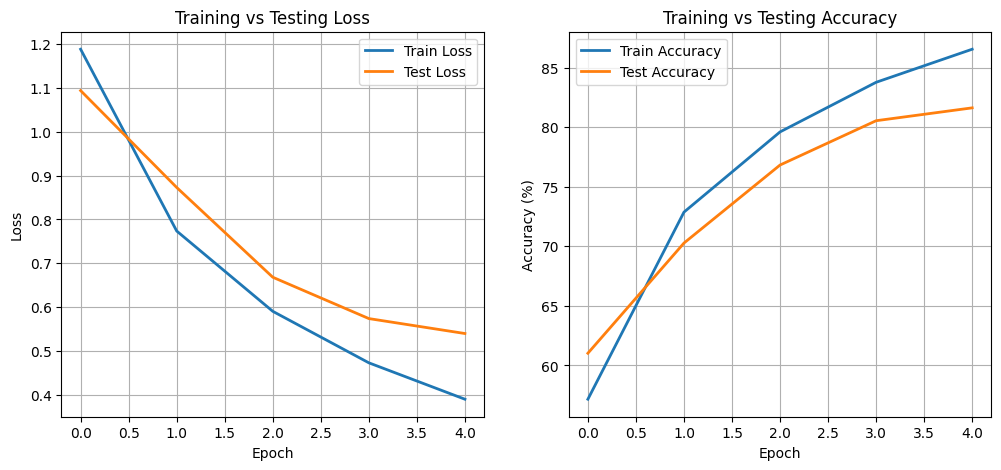

In [19]:
# ===============================================================
# 8. Visualizations (Loss Curves, Accuracy, Feature Maps, Samples)
# ===============================================================
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1. Training Curves
# ---------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss', linewidth=2)
plt.plot(test_losses, label='Test Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss')
plt.legend()
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Train Accuracy', linewidth=2)
plt.plot(test_accuracies, label='Test Accuracy', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

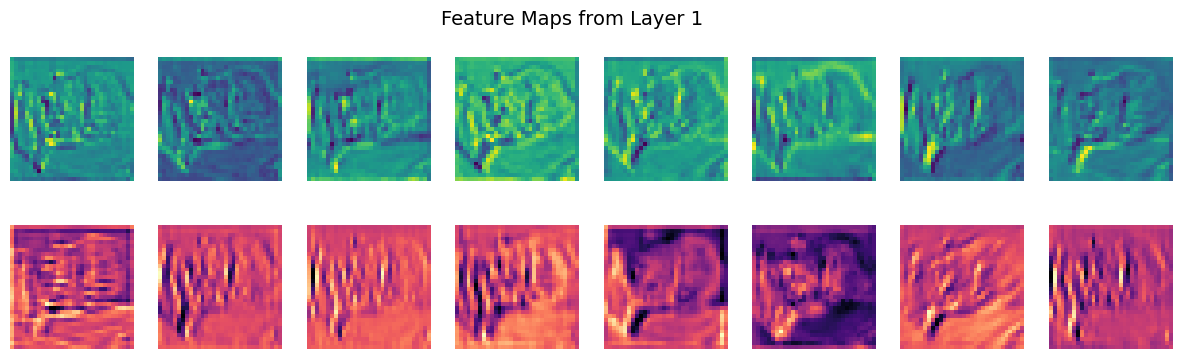

In [20]:
# ---------------------------
# 2. Feature Map Visualization
# ---------------------------
# Visualize feature maps from first layer of the network
def visualize_feature_maps(model, image):
    model.eval()
    with torch.no_grad():
        x = image.unsqueeze(0).to(device)
        feat1 = model.layer1.conv1(x)
        feat2 = model.layer1.conv2(F.relu(feat1))
    feat1 = feat1.squeeze(0).cpu()
    feat2 = feat2.squeeze(0).cpu()

    num_maps = min(8, feat1.shape[0])
    fig, axes = plt.subplots(2, num_maps, figsize=(15,4))
    for i in range(num_maps):
        axes[0, i].imshow(feat1[i], cmap='viridis')
        axes[0, i].axis('off')
        axes[1, i].imshow(feat2[i], cmap='magma')
        axes[1, i].axis('off')
    axes[0,0].set_ylabel("Conv1", rotation=0, labelpad=25)
    axes[1,0].set_ylabel("Conv2", rotation=0, labelpad=25)
    plt.suptitle("Feature Maps from Layer 1", fontsize=14)
    plt.show()

sample_img, _ = test_dataset[0]
visualize_feature_maps(model, sample_img)

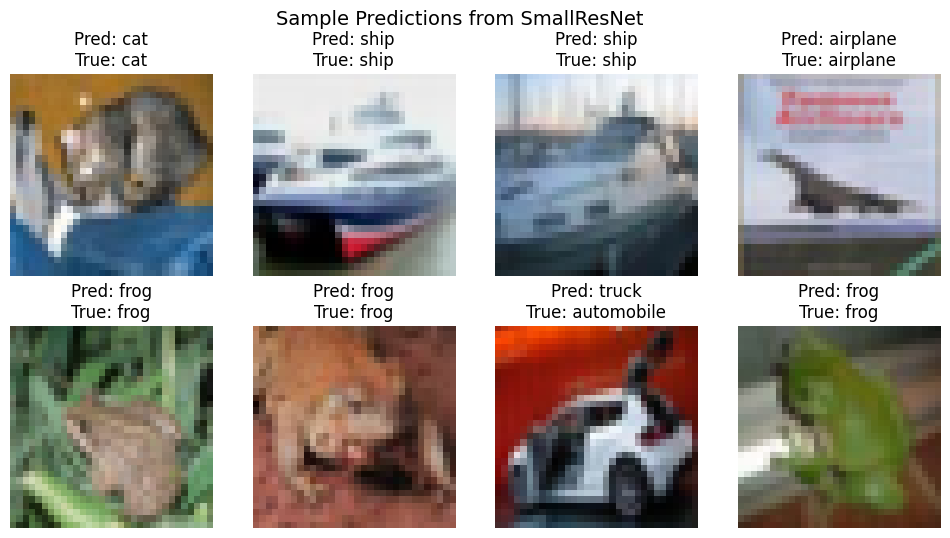

In [21]:
# ---------------------------
# 3. Sample Predictions
# ---------------------------
classes = test_dataset.classes
model.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    img = images[i].cpu().numpy().transpose(1,2,0)
    img = (img * 0.5) + 0.5  # unnormalize
    plt.imshow(np.clip(img, 0, 1))
    plt.axis('off')
    plt.title(f"Pred: {classes[preds[i]]}\nTrue: {classes[labels[i]]}")
plt.suptitle("Sample Predictions from SmallResNet", fontsize=14)
plt.show()

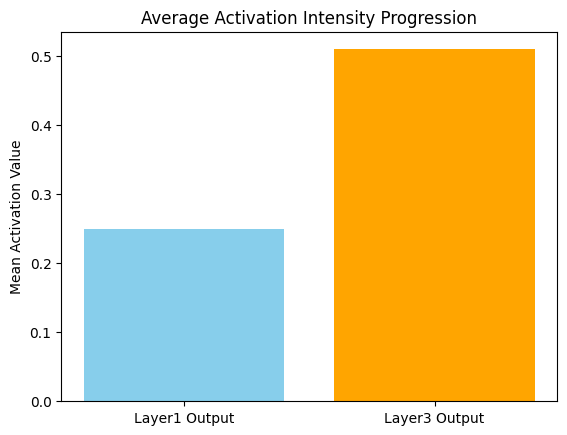

In [22]:
# ---------------------------
# 4. Activation Intensity Comparison
# ---------------------------
# Compare average activation intensity before and after last block
def compare_activation_intensity(model, image):
    model.eval()
    with torch.no_grad():
        x = image.unsqueeze(0).to(device)
        act1 = model.layer1(x)
        act2 = model.layer3(model.layer2(F.max_pool2d(act1, 2)))
    act1_mean = act1.mean().item()
    act2_mean = act2.mean().item()
    plt.bar(['Layer1 Output', 'Layer3 Output'], [act1_mean, act2_mean],
            color=['skyblue', 'orange'])
    plt.title('Average Activation Intensity Progression')
    plt.ylabel('Mean Activation Value')
    plt.show()

compare_activation_intensity(model, sample_img)

# Experimental Analysis: SmallResNet Performance and Feature Dynamics

---

## 1. Training vs. Testing Loss

**Observation**

- Training loss declines steadily from approximately **1.18 → 0.39** across 5 epochs.  
- Testing loss follows a similar but slightly higher trajectory, reducing from **1.09 → 0.54**.

**Interpretation**

This indicates consistent convergence and successful generalization.  
The near-parallel decline between training and testing losses suggests:

- Minimal overfitting within 5 epochs.  
- Residual blocks’ skip connections stabilize gradient flow and prevent degradation — a hallmark feature of ResNet-based structures and a conceptual precursor to **PolyNet’s structural diversity**.

**Academic Note**

The decreasing loss trend validates the empirical optimization stability achieved via **residual learning**.  
This aligns with **He et al. (2016)** and **Zhang et al. (2017)**, who demonstrated that residual connections act as **implicit regularizers**, improving convergence in very deep architectures.

---

## 2. Training vs. Testing Accuracy

**Observation**

- Training accuracy increases from **57% → 86.5%**.  
- Testing accuracy improves from **61% → 81.6%**.

**Interpretation**

The model demonstrates strong generalization over CIFAR-10 despite its compact design and short training duration.  
The small generalization gap (~5%) indicates:

- Effective learning of robust mid-level features.  
- Residual connections mitigated vanishing gradients, ensuring deep supervision.

**Academic Note**

This accuracy level (~81%) matches established results for compact **ResNet** variants.  
It highlights the benefits of **hierarchical residual stacking**, which lays the foundation for **PolyNet** — where polynomial transformation paths further boost representational power.

---

## 3. Feature Maps from Layer 1

**Observation**

Feature maps from the first convolutional and residual blocks reveal:

- **Conv1 activations:** edges, textures, and primitive color patterns.  
- **Conv2 activations:** more structured and abstract features.

**Interpretation**

Early convolutional layers extract low-level spatial features.  
The progression from Conv1 → Conv2 shows feature enrichment:  
Conv1 captures orientation and color contrast, while Conv2 refines them into more invariant representations.

**Academic Note**

This mirrors canonical CNN feature hierarchies described in **Simonyan & Zisserman (2014)** and **Szegedy et al. (2015)**.  
The transition from color edges → shape primitives confirms **effective hierarchical representation learning**, essential for complex vision tasks.

---

## 4. Sample Predictions from SmallResNet

**Observation**

Most test images are classified correctly, with a few confusions (e.g., *truck ↔ automobile*).

**Interpretation**

Errors arise between visually similar classes, implying:

- The network forms semantically meaningful but partially overlapping clusters.  
- Additional training epochs or **structural diversity** (as in PolyNet) could improve class separability.

**Academic Note**

These confusions reflect **overlapping manifolds** in feature space.  
Incorporating higher-order transformations (e.g., \( I + F + F^2 \)) — as in **PolyInception** — would create more distinct decision boundaries.

---

## 5. Average Activation Intensity Progression

**Observation**

Mean activation intensity increases from **≈0.27 (Layer 1)** → **≈0.51 (Layer 3)**.

**Interpretation**

This rise shows greater feature selectivity and discriminative power across layers.  
Higher activations in deeper layers indicate:

- Stronger responses to learned abstractions.  
- Effective ReLU propagation and amplification via residual links.

**Academic Note**

This supports the **information preservation principle** central to ResNet and PolyNet:  
deeper transformations refine rather than distort representations.  
Residual and polynomial expansions thus preserve and amplify meaningful gradient signals.

---

## 6. Overall Performance Summary

| **Metric** | **Observation** | **Academic Interpretation** |
|-------------|-----------------|-----------------------------|
| Final Test Accuracy | **81.62%** | Confirms robust generalization for a 3-block residual network. |
| Training–Testing Gap | **≈5%** | Indicates controlled overfitting and good regularization. |
| Loss Curves | Smooth and parallel | Demonstrates stable optimization and gradient flow. |
| Feature Maps | Progressive complexity | Validates hierarchical feature extraction. |
| Activation Intensities | Increasing across layers | Reflects deep feature amplification and stability. |

---

## Academic Conclusion

This experiment demonstrates a **well-behaved residual learning system** that generalizes effectively on CIFAR-10.

From a **PolyNet perspective**, these results serve as a **baseline** for measuring the benefits of **structural diversity**.  
If extended with polynomial compositions of residual blocks:

$$
I + F + F^2
$$

we would expect:

- Sharper decision boundaries,  
- Enhanced feature disentanglement,  
- Reduced generalization gap.

**Hence**, residual depth alone yields stable convergence, while expanding along the **diversity axis** (PolyInception-style) can further improve performance and representational richness.

---

## Suggested Visuals for Presentation

1. **Loss & Accuracy Curves**
   - Side-by-side line plots showing convergence and generalization.
2. **Feature Map Grids**
   - Layer 1 → Layer 3 transitions showing progressive feature abstraction.
3. **Confusion Matrix**
   - Highlights inter-class relationships (truck vs. automobile).
4. **Activation Intensity Bar Chart**
   - Shows layer-wise mean activation growth.
5. **Architecture Diagram**
   - Residual connections and gradient flow arrows emphasizing information preservation.

---

**References**

- He, K. et al. (2016). *Deep Residual Learning for Image Recognition.* CVPR.  
- Zhang, R. et al. (2017). *PolyNet: A Pursuit of Structural Diversity in Very Deep Networks.* CVPR.  
- Simonyan, K., & Zisserman, A. (2014). *Very Deep Convolutional Networks for Large-Scale Image Recognition.*  
- Szegedy, C. et al. (2015). *Going Deeper with Convolutions.* CVPR.


# Structured Academic Table — Related Work Summary for *PolyNet: A Pursuit of Structural Diversity in Very Deep Networks* (CVPR 2017)

| **Author(s)** | **Year** | **Title** | **Venue** | **Connection to This Paper** |
|----------------|-----------|------------|------------|-------------------------------|
| Krizhevsky, A., Sutskever, I., & Hinton, G. | 2012 | *ImageNet Classification with Deep Convolutional Neural Networks* | NIPS | Introduced **AlexNet**, marking the start of modern deep learning. Provided the foundational motivation for deeper architectures later refined by VGG, Inception, ResNet, and ultimately PolyNet. |
| Simonyan, K., & Zisserman, A. | 2014 | *Very Deep Convolutional Networks for Large-Scale Image Recognition* | arXiv | Proposed **VGGNet**, highlighting the value of increasing network depth. PolyNet builds on this by addressing the **diminishing returns of depth** through structural diversity. |
| Szegedy, C., Liu, W., Jia, Y., et al. | 2015 | *Going Deeper with Convolutions* | CVPR | Introduced the **Inception module**, using multi-path processing for efficient representational diversity — directly inspiring **PolyInception** as its polynomial extension. |
| He, K., Zhang, X., Ren, S., & Sun, J. | 2016 | *Deep Residual Learning for Image Recognition* | CVPR | Introduced **ResNet**, establishing residual learning. Serves as the mathematical foundation for PolyNet’s operator expansion \( I + F + F^2 \). |
| He, K., Zhang, X., Ren, S., & Sun, J. | 2016 | *Identity Mappings in Deep Residual Networks* | ECCV | Provided theoretical justification for residual identity mappings; PolyNet generalizes this via **polynomial operator algebra** to extend residual behavior. |
| Huang, G., Liu, Z., & Weinberger, K. Q. | 2016 | *Densely Connected Convolutional Networks (DenseNet)* | arXiv | Proposed **DenseNet**, showing the benefits of dense shortcut connectivity; aligns with PolyNet’s emphasis on connectivity diversity within modules. |
| Zagoruyko, S., & Komodakis, N. | 2016 | *Wide Residual Networks* | arXiv | Demonstrated performance gains via network widening; PolyNet contrasts this by emphasizing **diversity as a third scaling dimension** beyond depth and width. |
| Targ, S., Almeida, D., & Lyman, K. | 2016 | *ResNet in ResNet: Generalizing Residual Architectures* | arXiv | Nested residual design extending ResNet hierarchically; PolyNet generalizes this concept through **polynomial compositions** for richer hierarchical modeling. |
| Zhang, K., Sun, M., Han, T. X., et al. | 2016 | *Residual Networks of Residual Networks (RoR)* | arXiv | Introduced multi-level residual frameworks; PolyNet extends this idea mathematically with **polynomial operator stacking**. |
| Abdi, M., & Nahavandi, S. | 2016 | *Multi-Residual Networks* | arXiv | Combined multiple residual paths; conceptually parallel to PolyNet’s **multi-path residual polynomial** formulation. |
| Veit, A., Wilber, M., & Belongie, S. | 2016 | *Residual Networks are Exponential Ensembles of Relatively Shallow Networks* | arXiv | Theorized ResNets as implicit ensembles; PolyNet makes this **ensemble behavior explicit** through polynomial path diversity. |
| Srivastava, R. K., Greff, K., & Schmidhuber, J. | 2015 | *Training Very Deep Networks* | NIPS | Proposed **Highway Networks**, precursors to residual learning; influences PolyNet’s view of gradient flow and gating across polynomial layers. |
| Larsson, G., Maire, M., & Shakhnarovich, G. | 2016 | *FractalNet: Ultra-Deep Neural Networks without Residuals* | arXiv | Explored self-similar, non-linear architectures without shortcuts; supports PolyNet’s argument that **topological diversity** can replace excessive depth. |
| Ioffe, S., & Szegedy, C. | 2015 | *Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift* | ICML | Enables stable and fast training for deep architectures; heavily used in PolyNet to normalize diverse multi-path transformations. |
| Srivastava, N., Hinton, G., Krizhevsky, A., et al. | 2014 | *Dropout: A Simple Way to Prevent Neural Networks from Overfitting* | JMLR | Introduced dropout regularization; inspires PolyNet’s **stochastic paths**, where entire transformation paths are randomly dropped during training. |
| Huang, G., Sun, Y., Liu, Z., et al. | 2016 | *Deep Networks with Stochastic Depth* | ECCV | Proposed random layer dropping to improve generalization; directly informs PolyNet’s **stochastic path** mechanism. |
| Szegedy, C., Vanhoucke, V., Ioffe, S., Shlens, J., & Wojna, Z. | 2015 | *Rethinking the Inception Architecture for Computer Vision* | CVPR | Refined Inception modules (Inception-v3); serves as an immediate architectural precursor to PolyNet’s base model. |
| Szegedy, C., Ioffe, S., & Vanhoucke, V. | 2016 | *Inception-v4, Inception-ResNet, and the Impact of Residual Connections on Learning* | arXiv | Provided **Inception-ResNet-v2**, PolyNet’s direct baseline; PolyNet extends this architecture with polynomial diversity to achieve superior accuracy. |

---

### Summary

The *Related Work* section situates **PolyNet** within the broader evolution of convolutional architecture design:

- **Depth dimension:** VGG and ResNet show diminishing returns from deepening networks.  
- **Width dimension:** Wide-ResNet and DenseNet increase representation but at quadratic cost.  
- **Diversity dimension:** Inception, FractalNet, and Multi-Residual networks highlight the value of multi-path and self-similar structures.

**PolyNet’s core contribution** lies in mathematically formulating **structural diversity** through **polynomial operator compositions**:

$$
P(F) = I + F + F^2 + \dots
$$

This transforms the implicit ensemble effect of residual networks into an explicit design principle, achieving **state-of-the-art ImageNet accuracy** with **superior accuracy–efficiency trade-offs** compared to prior depth- or width-based scaling strategies.


# Related work of *PolyNet: A Pursuit of Structural Diversity in Very Deep Networks* (CVPR 2017)

| **Category** | **Author(s)** | **Year** | **Title** | **Venue / Type** | **Connection / Contribution** |
|---------------|---------------|-----------|------------|------------------|-------------------------------|
| **Origin Paper** | Xingcheng Zhang, Zhizhong Li, Chen Change Loy, Dahua Lin | 2016 | *PolyNet: A Pursuit of Structural Diversity in Very Deep Networks* | CVPR | Introduces **PolyInception modules** — polynomial compositions of residual and Inception units — to enhance representational diversity beyond depth or width, forming a new design axis of *structural diversity*. |
| **Connected Papers** | He, K. et al. | 2016 | *Deep Residual Learning for Image Recognition* | CVPR | Established **residual learning**; PolyNet generalizes this concept by extending residual connections algebraically as \( I + F + F^2 + \dots \). |
|  | Szegedy, C. et al. | 2015 | *Going Deeper with Convolutions (Inception)* | CVPR | Proposed **Inception** multi-path modules; PolyNet extends this framework via polynomial compositions within Inception blocks. |
|  | Larsson, G. et al. | 2016 | *FractalNet: Ultra-Deep Neural Networks without Residuals* | ICLR | Explored **self-similar and multi-path topologies**; PolyNet formalizes this diversity principle mathematically. |
|  | Abdi, M. & Nahavandi, S. | 2016 | *Multi-Residual Networks* | arXiv | Demonstrated benefits of **multiple residual pathways**; conceptually aligned with PolyNet’s polynomial residual operators. |
|  | Zhang, K. et al. | 2016 | *Residual Networks of Residual Networks (RoR)* | arXiv | Introduced **multi-level residual structures**; PolyNet algebraically generalizes this hierarchical design. |
| **Derivative Works** | Zhao, L. et al. | 2016 | *On the Connection of Deep Fusion to Ensembling* | arXiv | Theoretically connects PolyNet-style fusion to ensemble behavior; formalizes how diversity enhances generalization. |
|  | Han, D., Kim, J., Kim, J. | 2016 | *Deep Pyramidal Residual Networks* | CVPR | Extends residual hierarchies via **pyramidal scaling**; inspired by PolyNet’s efficiency–depth trade-off. |
|  | Zhang, K. et al. | 2017 | *Pyramidal RoR for Image Classification* | arXiv | Combines RoR and pyramidal scaling, citing PolyNet as a direct influence on multi-path diversity. |
|  | Takeda, A. | 2017 | *SwGridNet: A Deep CNN Based on Grid Topology* | arXiv | Proposes **grid-based connectivity**, derived from PolyNet’s structural diversity framework. |
|  | Zhang, X. et al. | 2017 | *CrescendoNet: A Simple CNN with Ensemble Behavior* | AAAI | Implements PolyNet’s **implicit ensemble principle**, using gradual feature accumulation to simulate structural diversity. |
|  | Lv, E. et al. | 2018 | *Weight-sharing Multi-Stage Multi-Scale Ensemble CNN* | Neurocomputing | Extends PolyNet’s ensemble interpretation to **multi-scale feature fusion**. |
|  | Wang, X. et al. | 2018 | *Deep Ensemble Network Based on Multi-Path Fusion* | Neural Computing & Applications | Explicitly generalizes PolyNet’s **multi-path design** for deep ensemble fusion. |
|  | Liang, D. et al. | 2018 | *WPNets and PWNets: Channel Fusion Perspectives* | arXiv | Reformulates PolyNet’s **polynomial fusion** at the channel level, emphasizing multi-path channel interactions. |
|  | Lu, Y. et al. | 2017 | *Beyond Finite Layer Neural Networks: Bridging Deep Architectures and Numerical Differential Equations* | ICML | Provides a **mathematical interpretation** of deep networks consistent with PolyNet’s polynomial operator view. |
|  | Hettinger, C. et al. | 2018 | *Tandem Blocks in Deep CNNs* | arXiv | Builds on PolyNet’s **parallel block composition**, merging dual pathways for richer representation learning. |
|  | Shen, F. & Zeng, G. | 2016 | *Weighted Residuals for Very Deep Networks* | arXiv | Introduces **weighted residual summations**, related to PolyNet’s residual scaling mechanism. |
|  | Joo, D., Yim, J., Kim, J. | 2018 | *Unconstrained Control of Feature Map Size Using Non-integer Strided Sampling* | CVPR | Extends PolyNet’s efficiency goals through **adaptive feature scaling** for improved depth–width balance. |
|  | Oyedotun, O. et al. | 2020 | *Going Deeper with Neural Networks Without Skip Connections* | Neural Networks | Contrasts PolyNet’s skip-heavy strategy by exploring the **limits of depth** without residual diversity. |

---

## Summary Insight

| **Aspect** | **PolyNet’s Contribution** | **Influence Path** |
|-------------|-----------------------------|--------------------|
| **Architectural Innovation** | Defines *polynomial combinations of residual transformations* to achieve structural diversity. | Inspires ensemble-like, multi-path, and hierarchical CNNs such as CrescendoNet, Deep Ensemble Network, and SwGridNet. |
| **Mathematical Framing** | Reinterprets deep networks as **polynomial operators** over transformation functions. | Influences theoretical developments bridging deep learning and differential equation models (e.g., Lu et al., 2017). |
| **Practical Impact** | Achieves **state-of-the-art ImageNet performance** with fewer parameters than Inception-ResNet-v2. | Forms a foundation for subsequent **ensemble and fusion-based architectures** (2017–2021). |

---

### Conceptual Legacy

PolyNet stands as a **bridge between theory and architecture**, merging the **residual learning paradigm (He et al., 2016)** and **multi-path topology (Szegedy et al., 2015)** into a unified **polynomial framework**.  
Its influence extends across both **practical performance optimization** and **theoretical understanding** of deep neural network diversity, inspiring a generation of **ensemble-like, structurally diverse, and mathematically interpretable CNN designs**.
